# **4-1. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!**

여기서 잠깐, 물론 캐글에서의 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것은 절대 아닙니다.
앞선 과정에서 배웠거나 앞으로 배울 내용에서도 다루듯 모델의 성능을 최적화하는 방법은 매우 많고 지금도 끊임없이 연구되고 있습니다.

예를 들면 가장 기본적으로는 데이터를 깊게 탐색하는 **EDA** 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정하는 등의 피처 엔지니어링을 진행함으로써 데이터를 정제하는 것이 매우 중요합니다. 데이터가 무엇이냐에 따라, 그리고 그 데이터를 어떻게 정제하느냐에 따라 모델의 파라미터를 튜닝하는 것만으로는 절대 얻을 수 없는 성능 향상이 이루어질 수 있습니다.

오늘은 이렇게 다양한 방법론 중 하이퍼 파라미터 튜닝에 집중해서 모델의 성능을 최대한 끌어올려보지만, 튜닝은 최적화 방법 중 하나일 뿐이라는 것을 잊지 마세요!

In [1]:
import xgboost
import lightgbm
import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


1.4.2
3.3.0
0.5.0
1.0


# ✓ 튜닝해볼 수 있는 모델 클래스 인자
---
대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

- max_depth : 의사 결정 나무의 깊이, 정수 사용
- learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
- n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
- num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
- boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력

위에서 저는 `n_estimators`와 `max_depth` 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.
실제로 `lightgbm`에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

- [lightGBM / XGBoost 파라미터 설명](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
- [Chapter 4. 분류 - LightGBM](https://injo.tistory.com/48)

실험 과정에서는 물론 위에서 만들었던 my_GridSearch(), save_submission() 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!

# ✓ 시도해볼 수 있는 방법
---
여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

- 기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
- LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
- 다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
- Baseline 커널에서 활용했던 블렌딩 방법 활용하기

물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

- https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks

아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다.

# 프로젝트 루브릭
---
- 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 전과정이 성공적으로 진행되었는가?
- 제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었는가?
- 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었는가?

# 1. 데이터 호출 및 EDA

In [6]:
#라이브러리 갖고오기

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm #Analysis
from sklearn.preprocessing import StandardScaler #Analysis
from scipy import stats #Analysis

In [7]:
data_dir = os.getenv("HOME") + '/aiffel/kaggle_kakr_housing/data'
# hint : os.getenv를 사용하거나 직접 경로를 작성

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


In [8]:
#데이터 호출
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(sub_data_path)

In [9]:
# 데이터 shape확인
print(df_train.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


In [10]:
# date의 경우 yyyymmdd+T000000의 형태로 T000000은 의미 없는 데이터므로 이후에 삭제해주는 것이 좋을듯.
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


변수 설명
변수 설명은 SANGEUN KIM님의 [커널](https://www.kaggle.com/code/tichangel/gdg-gwangju-a-to-z-cheetsheet)을 참고 하였습니다.

- ID : 집을 구분하는 번호
  - 고유번호로 이뤄져 있음.
- date : 집을 구매한 날짜
  - 뒤에 쓸모 없는 값이 있는데 T000000 부분은 제외 해주는게 좋음.
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
  - bathroom의 소수점 의미
- sqft_living : 주거 공간의 평방 피트(면적)
  - 1sqft=0.0281평이고 sqft_living은 전물 공급면적 인것 같다.
- sqft_lot : 부지의 평방 피트(면적)
  - sqft는 부지의 평방 피트. 대지규모. 우리나라 단독주택으로 치면 땅 크기다.
- floors : 집의 층 수
  - 소수점이 존재하는데 온전한 층이 아니라 다락방 수준일때 0.5가 붙음.
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
  - 0은 없는 것이고 1은 있는것. 벨뷰/시애틀 지역에 강 조망이 가능한 곳은 집값이 조금 높은편
- view : Has been viewed
  - 1~5로 이뤄져있으며, 집 외관에 대한 평가
- condition : 집의 전반적인 상태
  - 1~5로 이뤄져있으며, 집의 전반적 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
  - 1~13 값으로 이뤄져있으며, 1~3은 건물 건축 및 디자인이 낮음, 7은 평균수준의 건축및 디자인, 11~13은 높은 수준의 디자인. 높을 수록 좋은 등급임.
- sqft_above : 지하실을 제외한 평방 피트(면적)
  - 지하실을 제외한 지상의 평방 미터. 국내 주택 면적 산정시에도 지하면적은 제외됨.
- sqft_basement : 지하실의 평방 피트(면적)
  - 지하실 면적
- yr_built : 지어진 년도
  - 1900 ~ 2015
- yr_renovated : 집을 재건축한 년도
  - 1940 ~ 2015 , 0은 한번도 재건축 된 적이 없는 집
- zipcode : 우편번호
  - 실제 값을 나타냄, 위도 경도와 일치(google map으로 조회하면됨)
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음
- sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
  - sqft_living15 / lot15는 가까운 주변 15개 평균 평방 피트라는 말도 있어서 사용하실때 감안하고 쓰셔야할것 같네요.

In [11]:
#descriptive statistics summary
df_train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [12]:
#데이터 통계량 확인
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
# 결측치 확인
# 확인상 데이터 결측치는 존재하지 않음
df_train.isnull().sum()
df_test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
#train 데이터에서 price 변수와의 관계분석을 진행
cor_mat = df_train.corr()
cor_mat["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702899
grade            0.667211
sqft_above       0.608577
sqft_living15    0.586419
bathrooms        0.525479
view             0.400806
bedrooms         0.323672
sqft_basement    0.322218
lat              0.301604
waterfront       0.265738
floors           0.262588
yr_renovated     0.140808
sqft_lot         0.096793
sqft_lot15       0.086384
yr_built         0.047290
condition        0.039740
long             0.023547
id               0.020899
zipcode         -0.051498
Name: price, dtype: float64

`sqft_living`, `grade`, `sqft_above`, `sqft_living15` 정도가 `price`과 상관관계를 어느정도 가진다고 볼 수 있겠으며, `sqft_living`의 경우 강한 상관관계를 가짐.

### 상관관계가 높은 변수
- sqft_living : 주거 공간의 평방 피트(면적)
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

### 상관관계가 낮은 변수
- ID : 집을 구분하는 번호 #제거
- zipcode : 우편번호 #제거
- long : 경도
- condition : 집의 전반적인 상태
- yr_built : 지어진 년도

<AxesSubplot:xlabel='price', ylabel='Density'>

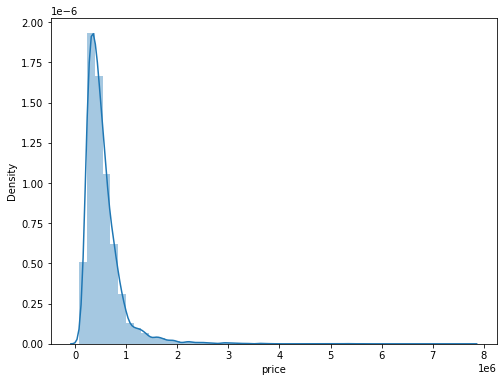

In [15]:
# price 데이터 시각화결과 치우쳐져 있으며 왜도와 첨도를 통하여 수치화

f, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_train['price'])

In [16]:
print("왜도: %f" % df_train['price'].skew())
print("첨도: %f" % df_train['price'].kurt())

왜도: 4.290252
첨도: 40.154919


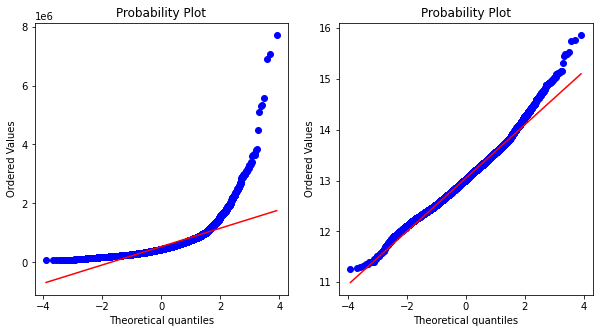

In [17]:
#price함수에 log를 취해준 결과 정규성이 기존보다 더 높아진 것을 확인
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt) #기존 price에 로그를 취함

In [18]:
#변경 후 왜도 첨도 확인
df_train['price'] = np.log(df_train['price'])

print("왜도: %f" % df_train['price'].skew())
print("첨도: %f" % df_train['price'].kurt())
df_train['price'].describe()

왜도: 0.433095
첨도: 0.731602


count    15035.000000
mean        13.048120
std          0.527472
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

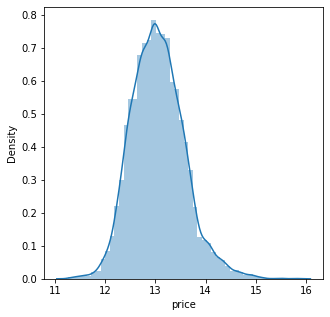

In [19]:
#histogram
plt.subplots(figsize=(5, 5))
sns.distplot(df_train['price'])

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


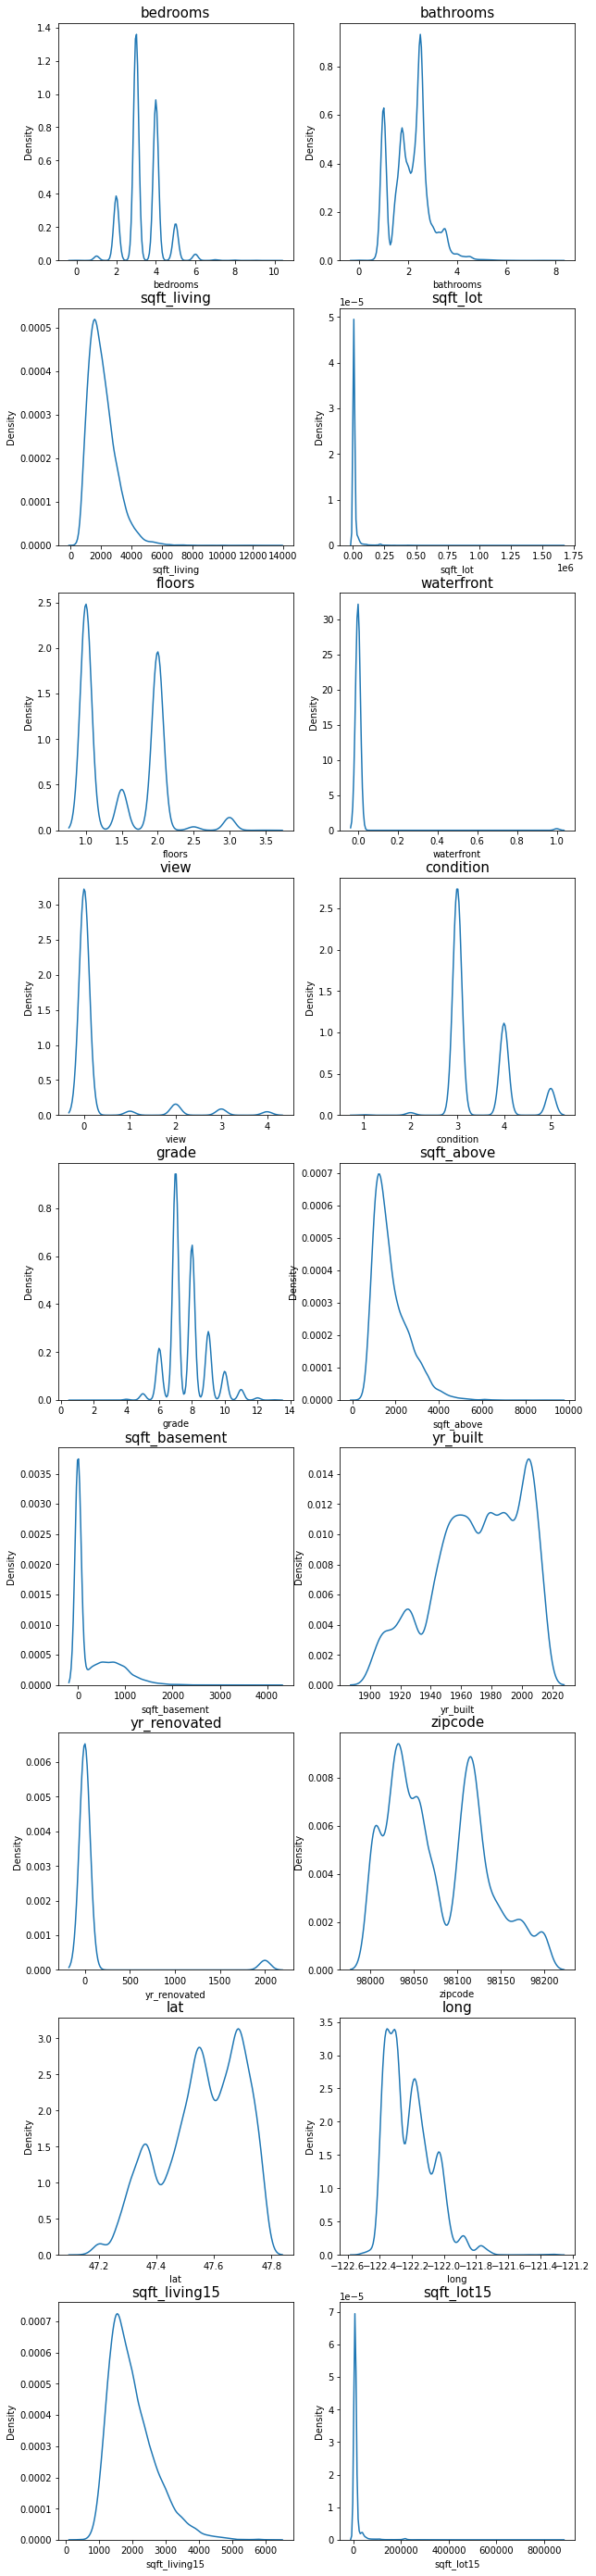

In [20]:
# 다른 칼럼의 분포도 확인
fig, ax = plt.subplots(9, 2, figsize=(10, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요.

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 3
columns = df_train.columns
print(columns)
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=df_train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

# 아래 그래프 중에서는 bedrooms, sqft_living, sqft_lot, ,view, yr_renovated ,waterfront, sqft_above, sqft_basement, sqft_living15, sqft_lot15 변수가 한쪽으로 치우친 경향을 보이는군요.

In [21]:
# date 변수를 년월일로 분류하여 신규 데이터 생성
df_train['year'] = df_train['date'].apply(lambda i : i[:4])
df_train['month'] = df_train['date'].apply(lambda i : i[4:6]).astype(int)
df_train['day'] = df_train['date'].apply(lambda i : i[6:8]).astype(int)

#신규 변수 데이터 확인
print(df_train['year'].value_counts()) #14, 15년도 2가지
print(df_train['month'].value_counts()) #1~12월
print(df_train['day'].value_counts()) #1일부터 31일인데 1일의 경우 31일을 제외하고 가장 수가 적음


2014    10229
2015     4806
Name: year, dtype: int64
5     1700
7     1582
4     1525
6     1500
8     1361
10    1322
3     1300
9     1227
12    1004
11     981
2      842
1      691
Name: month, dtype: int64
23    630
9     590
5     572
20    570
24    547
16    527
27    524
2     524
22    522
8     517
10    511
25    508
18    508
17    500
13    496
6     494
12    493
11    492
4     476
26    475
21    460
14    456
29    456
3     455
7     453
19    437
28    434
30    420
15    411
1     394
31    183
Name: day, dtype: int64


# 1-2 학습진행

In [22]:
# 신규 columns를 추가하고 상관도가 0.3이하인 변수를 제외하고 학습 진행
# 신규 추가 columns : month, year, day
# 삭제 columns : zipcode, id, condition, long, yr_built, sqft_lot15, yr_renovated, sqft_lot, waterfront, sqft_basement
# 최종 데이터 셋 생성

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

# y 변수에 price를 넣어두고, train에서는 삭제
y = train['price']
del train['price']

col_nm = ['zipcode', 'id', 'condition', 'long', 'yr_built',  'yr_renovated', 'sqft_lot', 'waterfront', 'sqft_basement', 'date']
# col_nm = ['zipcode', 'id','date']

def dataset(a):
  # 생성
  a['year'] = a['date'].apply(lambda i : i[:4]).astype(int)
  a['month'] = a['date'].apply(lambda i : i[4:6]).astype(int)
  a['day'] = a['date'].apply(lambda i : i[6:8]).astype(int)
  # 제거
  for i in col_nm:
    del a[i]
  return a

df_train = dataset(train)
df_test = dataset(test)
df_test

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,lat,sqft_living15,sqft_lot15,year,month,day
0,3,2.25,2570,2.0,0,7,2170,47.7210,1690,7639,2014,12,9
1,4,3.00,1960,1.0,0,7,1050,47.5208,1360,5000,2014,12,9
2,4,4.50,5420,1.0,0,11,3890,47.6561,4760,101930,2014,5,12
3,3,1.00,1780,1.0,0,7,1050,47.5123,1780,8113,2015,4,15
4,3,2.50,1890,2.0,0,7,1890,47.3684,2390,7570,2015,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,3,1.75,1500,1.0,0,6,1500,47.3095,1320,11303,2014,6,26
6464,3,2.00,1490,3.0,0,8,1490,47.5699,1400,1230,2015,1,26
6465,3,2.50,1310,2.0,0,8,1180,47.5773,1330,1265,2015,2,19
6466,2,0.75,1020,2.0,0,7,1020,47.5944,1020,2007,2014,6,23


In [23]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

In [24]:
# 먼저 필요한 라이브러리를 가져오겠습니다.
# 데이터셋을 훈련 데이터셋과 검증 데이터셋으로 나누기 위한 train_test_split 함수와, RMSE 점수를 계산하기 위한 mean_squared_error를 가져옵니다.

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
# 대회에서 점수를 매기는 것과 같은 평가 척도인 RMSE를 계산하기 위해 다음과 같은 함수를 만들어놓겠습니다.
# 한 가지 주의해야 할 것은, y_test나 y_pred는 위에서 np.log1p()로 변환이 된 값이기 때문에 원래 데이터의 단위에 맞게 되돌리기 위해 np.expm1()을 추가해야 한다는 점입니다.
# exp로 다시 변환해서 mean_squared_error를 계산한 값에 np.sqrt를 취하면 RMSE 값을 얻을 수 있겠죠!

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [26]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [27]:
# 같이 모델 인스턴스를 생성한 후 models라는 리스트에 넣어줍니다.
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다.
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [28]:
# 모델이 주어지면 rmse를 구하는 함수를 만들어봅시다.
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(
            train, y, random_state=random_state,
            test_size = 0.2
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_pred, y_test)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,161941.794255
RandomForestRegressor,160413.916949
XGBRegressor,154878.829205
LGBMRegressor,154222.251482


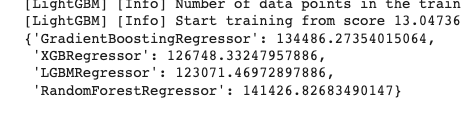

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 20],
}

In [47]:
model = LGBMRegressor(random_state=random_state)

print('얍💢')

얍💢


In [48]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 20], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
# 자, grid_model.fit 함수를 통해서 4가지 조합에 대한 실험을 모두 마쳤습니다.
# 실험에 대한 결과는 다음과 같이 grid_model.cv_results_ 안에 저장됩니다.

grid_model.cv_results_

{'mean_fit_time': array([0.284407  , 0.45548697, 0.65990553, 0.86822648]),
 'std_fit_time': array([0.07752897, 0.09872895, 0.13035569, 0.29241842]),
 'mean_score_time': array([0.01951189, 0.0499002 , 0.05377297, 0.06520777]),
 'std_score_time': array([0.00395967, 0.02003124, 0.01457879, 0.02753962]),
 'param_max_depth': masked_array(data=[1, 1, 20, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 20, 'n_estimators': 50},
  {'max_depth': 20, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05707062, -0.04043544, -0.03952575]),
 'split1_test_score': array([-0.07666447, -0.05893677, -0.04199212, -0.04114193]),
 'split2_test_score': array([-0.07354904

In [34]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 20, 'n_estimators': 50},
 {'max_depth': 20, 'n_estimators': 100}]

In [35]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07335599, -0.05593625, -0.04037753, -0.03958482])

In [36]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073356
1,1,100,-0.055936
2,20,50,-0.040378
3,20,100,-0.039585


In [37]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073356,0.270843
1,1,100,-0.055936,0.236508
2,20,50,-0.040378,0.200942
3,20,100,-0.039585,0.198959


In [38]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073356,0.270843
1,1,100,-0.055936,0.236508
2,20,50,-0.040378,0.200942
3,20,100,-0.039585,0.198959


In [39]:
# 위의 표를 `RMSLE`가 낮은 순서대로 정렬해주세요.
results.sort_values(by=['RMSLE'])

,max_depth,n_estimators,score,RMSLE
3,20,100,-0.039585,0.198959
2,20,50,-0.040378,0.200942
1,1,100,-0.055936,0.236508
0,1,50,-0.073356,0.270843


In [40]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [41]:
# 먼저 위에서 만들어놓은 my_GridSearch() 함수로 간단한 그리드 탐색을 해보겠습니다.
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.039556,0.198888
2,10,50,-0.040433,0.201081
1,1,100,-0.055936,0.236508
0,1,50,-0.073356,0.270843


In [42]:
# 가장 좋은 조합은 max_depth=10, n_estimators=100 이군요.
# 해당 모델로 학습을 해서 예측값인 submission.csv 파일을 만들어서 제출해보겠습니다.
# 먼저 해당 파라미터로 구성된 모델을 준비하고, 학습 후 예측 결과를 생성합니다.

model = LGBMRegressor(max_depth=20, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.11871414, 12.79761406, 14.14434216, ..., 12.92965555,
       12.62996916, 12.93342701])

In [43]:
prediction = np.expm1(prediction)
prediction

array([ 498177.70474913,  361353.2497334 , 1389342.87033435, ...,
        412360.45098503,  305579.69467559,  413918.58931821])

In [51]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [52]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,4.981777e+05
1,15036,3.613532e+05
2,15037,1.389343e+06
3,15038,3.442980e+05
4,15039,3.058403e+05


In [53]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [55]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [56]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

# 성능 향상 시작
캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻어야 함

In [57]:
train
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

In [58]:
from sklearn.model_selection import RandomizedSearchCV

def my_RandomSearch(model, train, y, param, n_iter= 5, verbose=1, n_jobs=5):

    # 1. GridSearchCV 모델로 `model`을 초기화합니다.
    random_model = RandomizedSearchCV(model, param_distributions=param, \
                        scoring='neg_mean_squared_error', \
                              n_iter =  n_iter, \
                        cv=10, verbose=1, n_jobs=-1)

    # 2. 모델을 fitting 합니다.
    random_model.fit(train, y)

    # 3. params, score에 각 조합에 대한 결과를 저장합니다.
    params = random_model.cv_results_['params']
    score = random_model.cv_results_['mean_test_score']

    # 4. 데이터 프레임을 생성
    results = pd.DataFrame(params)
    results["score"] = score

    # 5. RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
    results['RMSLE'] = np.sqrt(-1 * results['score'])

    results = results.sort_values("RMSLE")
    return results

In [ ]:
#try after getting score which is lower 110000
param = {
    'n_estimators': [int(x) for x in range(400,500,2)],
    'max_depth': [int(x) for x in range(0,15)],
}
n_iter = 100

model = LGBMRegressor(random_state=random_state)
my_RandomSearch(model, train, y, param, n_iter, verbose=1) #n_job은 안에 넣음

#range(0,200,2) 진행결과 estimator : 166, max_depth : 9 가 rmsle 0.197547
#range(200,400,2) 진행결과 estimator : 210, max_depth : 12 가 rmsle 0.197587
#range(400,500,2) 진행결과 estimator : 404, max_depth : 4 가 rmsle 0.198614

[CV] END .......................max_depth=1, n_estimators=50; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.3s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=10, n_estimators=50; total time=   1.0s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.0s
Fitting 10 folds for each of

- 기존 노드와 달리 date 칼럼을 년/월/일로 세분화 하여 진행하였는데(노드는 'date'칼럼을 년월만 인트로 변경) score가 더 낮게 형성되었는 것으로 확인됨.
- 기존 노드와 같이 date 칼럼을 수정하고 다시 randomsearch를 진행하고자 함. 시간분배를 위하여 150부터 300까지 진행


In [ ]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [ ]:
# 타켓, id 데이터 삭제 for trianing
# date change
# train['year'] = train['date'].apply(lambda i : i[:4]).astype(int)
# train['month'] = train['date'].apply(lambda i : i[4:6]).astype(int)
# train['day'] = train['date'].apply(lambda i : i[6:8]).astype(int)
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)


y = train['price']
del train['price']
del train['id']

# test의 id 컬럼 삭제
# test['year'] = test['date'].apply(lambda i : i[:4]).astype(int)
# test['month'] = test['date'].apply(lambda i : i[4:6]).astype(int)
# test['day'] = test['date'].apply(lambda i : i[6:8]).astype(int)
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

# y log change
y = np.log1p(y)

In [ ]:
#try after getting score which is lower 110000
param = {
    'n_estimators': [int(x) for x in range(500,600,2)],
    'max_depth': [int(x) for x in range(0,15)],
}
n_iter = 50

model = LGBMRegressor(random_state=random_state)
my_RandomSearch(model, train, y, param, n_iter, verbose=1)

#range(150,300,2) 진행결과 estimator : 288, max_depth : 10 가 rmsle 0.161052
#range(300,400,2) 진행결과 estimator : 380, max_depth : 8 가 rmsle 0.160893
#range(400,450,2) 진행결과 estimator : 404, max_depth : 0 가 rmsle 0.160915
#range(400,450,2) 진행결과 estimator : 402, max_depth : 8 가 rmsle 0.160941
#range(400,450,2) 진행결과 estimator : 402, max_depth : 8 가 rmsle 0.160941

In [ ]:
random_state

In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=558, random_state=random_state)
model.fit(train, y)

prediction = model.predict(test)
prediction = np.expm1(prediction)
prediction

In [ ]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = '/content/drive/MyDrive/아이펠/EXPLORATION_RS6/data/exp_2_kaggle'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [ ]:
# save_submission(model, train, y, test, 'sample_submission_288_10', rmsle=None) #private score 111,047
# save_submission(model, train, y, test, 'sample_submission_350_0', rmsle=None) #private score 111,295
# save_submission(model, train, y, test, 'sample_submission_404_0', rmsle=None) #private score 111,408
# save_submission(model, train, y, test, 'sample_submission_402_8', rmsle=None) #private score 111,951
# save_submission(model, train, y, test, 'sample_submission_380_10', rmsle=None) #private score 110,864
# save_submission(model, train, y, test, 'sample_submission_380_15', rmsle=None) #private score 111,637
# save_submission(model, train, y, test, 'sample_submission_379_8', rmsle=None) #private score 111,907
# save_submission(model, train, y, test, 'sample_submission_380_8', rmsle=None) #private score 111,884
# save_submission(model, train, y, test, 'sample_submission_394_9', rmsle=None) #private score 110,657
# save_submission(model, train, y, test, 'sample_submission_394_11', rmsle=None) #private score 110,957
# save_submission(model, train, y, test, 'sample_submission_380_8_2', rmsle=None) #private score 110,957
# save_submission(model, train, y, test, 'sample_submission_380_8_3', rmsle=None) #private score 110,957
save_submission(model, train, y, test, 'sample_submission_558_10', rmsle=None) #private score 109,921

# 회고
- EDA를 진행하고 거기서 신규 변수 생성 및 탈락을 진행해서 학습을 진행해 보았지만, 기존 노드학습보다 rmse값이 개선되지 않았음.